
# Linear Regression Project - Solutions

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
**Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline
(You'll import sklearn as you need it.)**

In [10]:
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as s

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

**Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [11]:
customers = p.read_csv("Ecommerce Customers (1).csv")
print(customers.to_string())

                                       Email                                                               Address                Avatar  Avg. Session Length  Time on App  Time on Website  Length of Membership  Yearly Amount Spent
0                  mstephenson@fernandez.com                          835 Frank Tunnel\nWrightmouth, MI 82180-9605                Violet            34.497268    12.655651        39.577668              4.082621           587.951054
1                          hduke@hotmail.com                        4547 Archer Common\nDiazchester, CA 06566-8576             DarkGreen            31.926272    11.109461        37.268959              2.664034           392.204933
2                           pallen@yahoo.com            24645 Valerie Unions Suite 582\nCobbborough, DC 99414-7564                Bisque            33.000915    11.330278        37.110597              4.104543           487.547505
3                    riverarebecca@gmail.com                      1414 David

**Check the head of customers, and check out its info() and describe() methods.**

In [12]:
print(customers.head())



                           Email  ... Yearly Amount Spent
0      mstephenson@fernandez.com  ...          587.951054
1              hduke@hotmail.com  ...          392.204933
2               pallen@yahoo.com  ...          487.547505
3        riverarebecca@gmail.com  ...          581.852344
4  mstephens@davidson-herman.com  ...          599.406092

[5 rows x 8 columns]


In [13]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [14]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

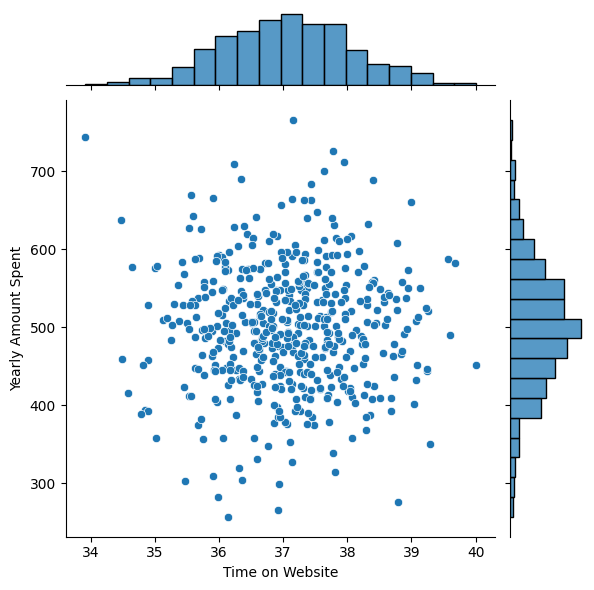

In [15]:
s.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)


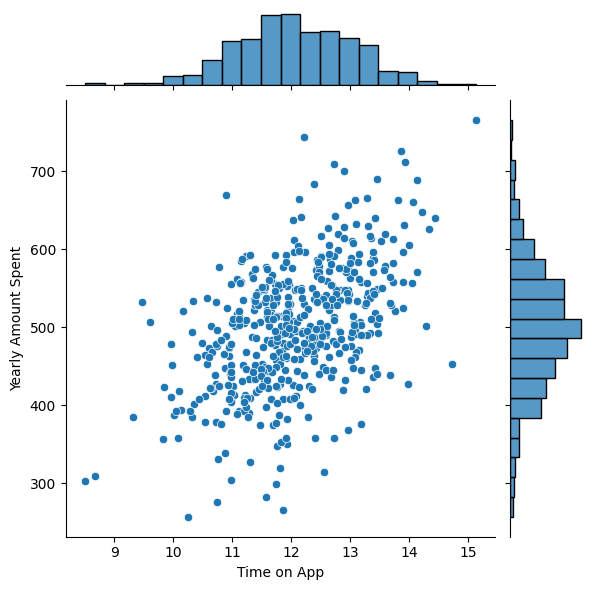

**Do the same but with the Time on App column instead.**

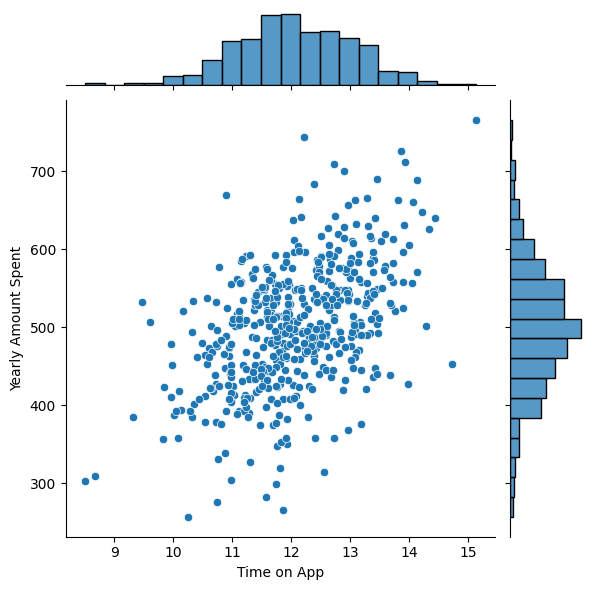

In [16]:
s.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

**Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

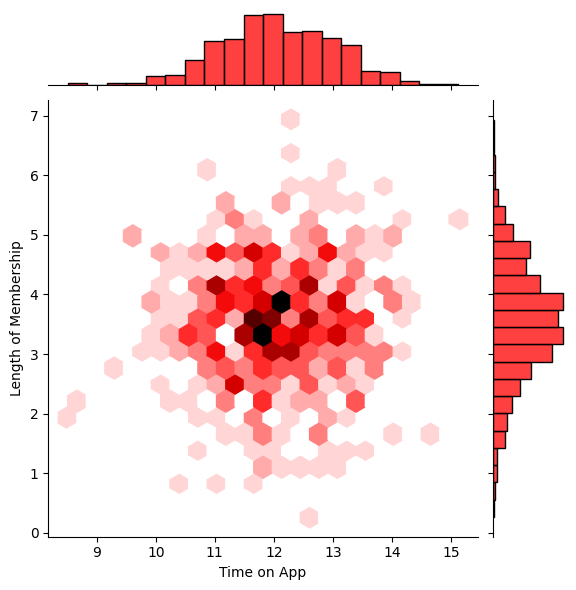

In [17]:
s.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers,color='red')

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

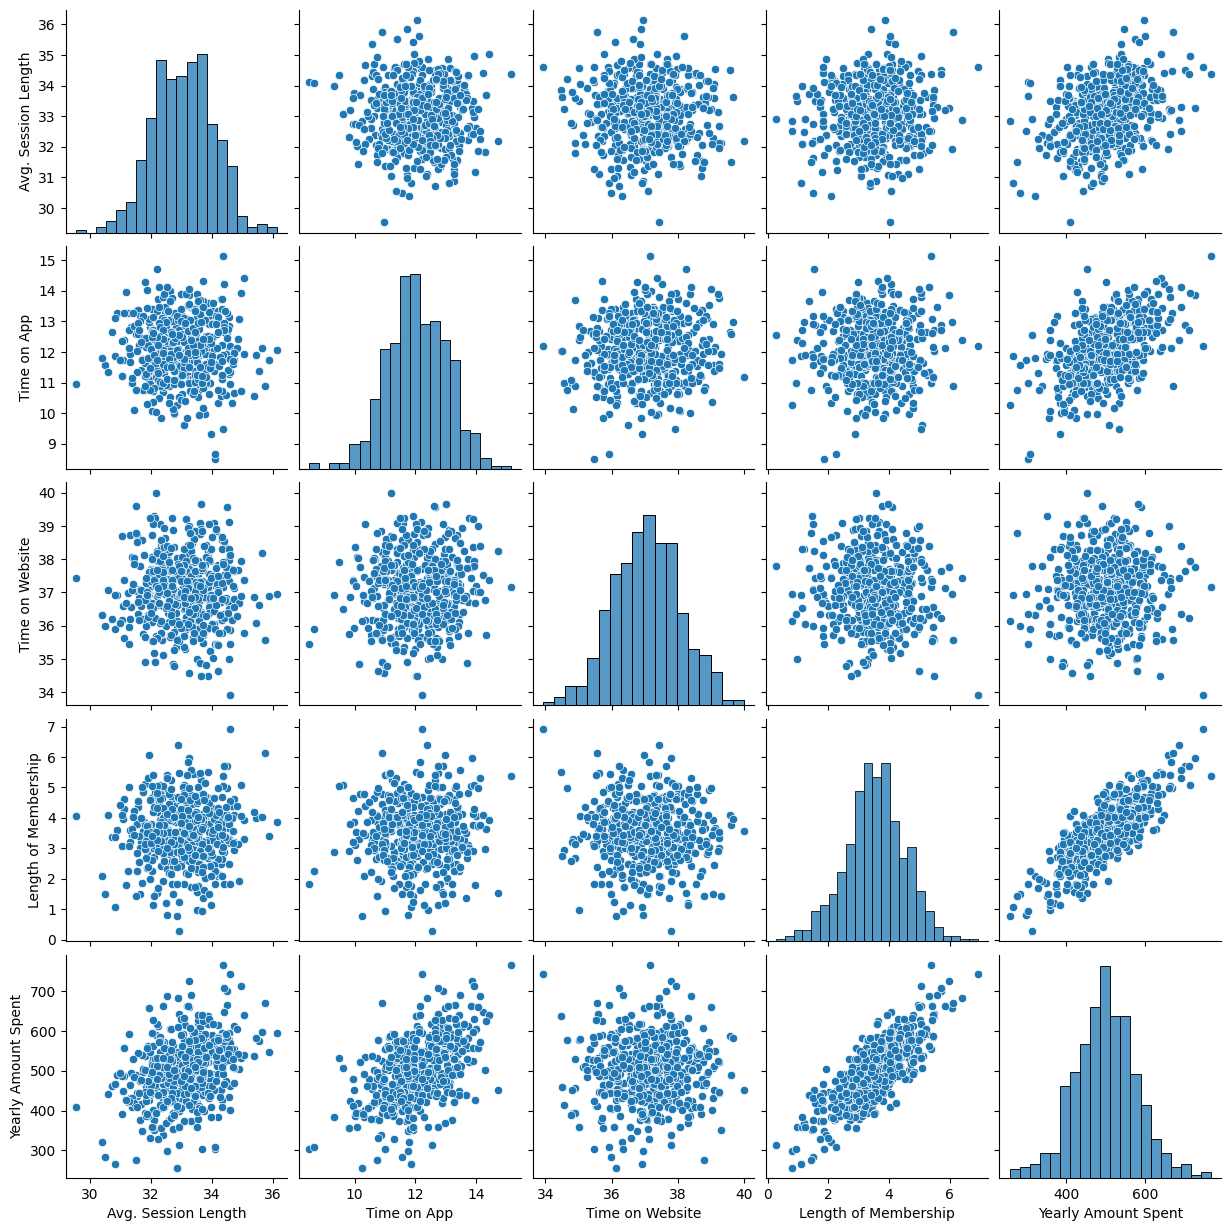

In [18]:
s.pairplot(customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [19]:
Length of membaership

SyntaxError: invalid syntax (3220323122.py, line 1)

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.**

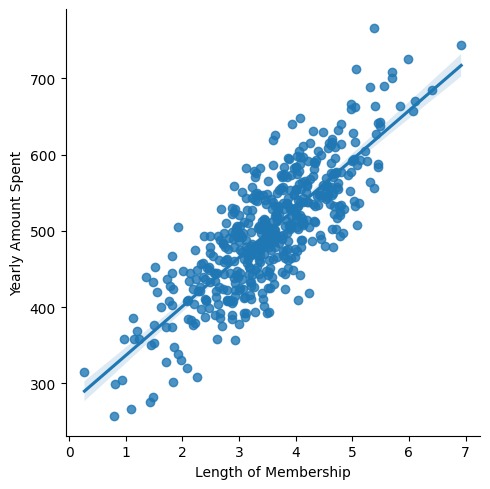

In [20]:
s.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
**Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.**

In [21]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [22]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']
from sklearn import model_selection
model_selection.train_test_split(X, y, test_size=0.3, random_state=101)

[     Avg. Session Length  Time on App  Time on Website  Length of Membership
 202            31.525752    11.340036        37.039514              3.811248
 428            31.862741    14.039867        37.022269              3.738225
 392            33.258238    11.514949        37.128039              4.662845
 86             33.877779    12.517666        37.151921              2.669942
 443            33.025020    12.504220        37.645839              4.051382
 ..                   ...          ...              ...                   ...
 63             32.789773    11.670066        37.408748              3.414688
 326            33.217188    10.999684        38.442767              4.243813
 337            31.827979    12.461147        37.428997              2.974737
 11             33.879361    11.584783        37.087926              3.713209
 351            32.189845    11.386776        38.197483              4.808320
 
 [350 rows x 4 columns],
      Avg. Session Length  Time on Ap

## Training the Model

Now its time to train our model on our training data!

**Import LinearRegression from sklearn.linear_model**

In [23]:
import sklearn.linear_model

**Create an instance of a LinearRegression() model named lm.**

In [24]:
Im = sklearn.linear_model.LinearRegression()

**Train/fit lm on the training data.**

In [25]:
Im.fit(X, y)

LinearRegression()

**Print out the coefficients of the model**

In [26]:
print(Im.coef_)

[25.73427108 38.70915381  0.43673884 61.57732375]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**Use lm.predict() to predict off the X_test set of the data.**

In [27]:
predictions = Im.predict(X)

**Create a scatterplot of the real test values versus the predicted values.**

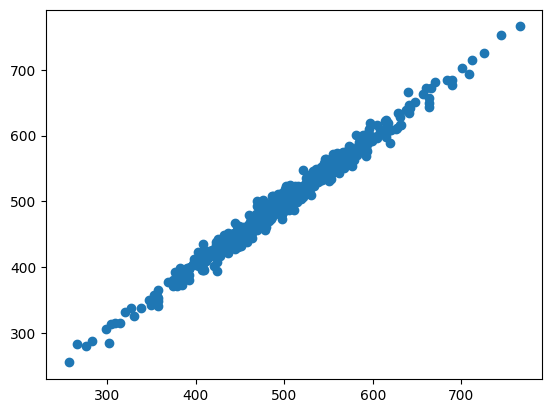

In [28]:
plt.scatter(y, predictions)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [33]:
from sklearn import metrics
MAE= metrics.mean_absolute_error(y, predictions)
MSE= metrics.mean_squared_error(y, predictions)
RMSE= n.sqrt(MSE)
print(MSE,MAE,RMSE)

98.47102522149001 7.877162860953777 9.923256785022245


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

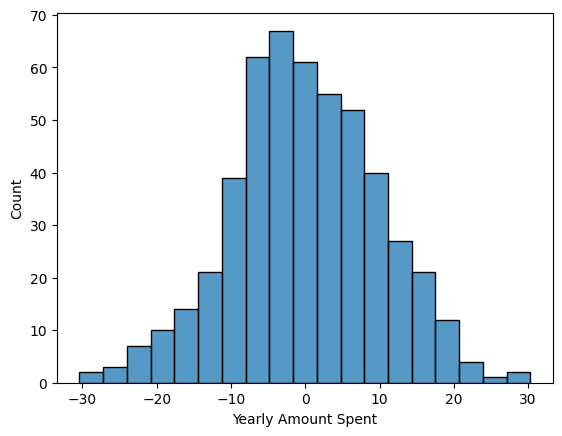

In [44]:
s.histplot(y-predictions)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

**Recreate the dataframe below.**

In [43]:
a=p.DataFrame(Im.coef_,X.columns,columns=['Coefficient'])
a

,Coefficient
Avg. Session Length,25.734271
Time on App,38.709154
Time on Website,0.436739
Length of Membership,61.577324


**How can you interpret these coefficients?**

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**


This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!


## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.